# Notebook 4 - Interpolate Top Carboniferous Muenster Basin

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from online services (WMS, WCS, WFS) or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, chosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems (=GIS) such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook presents the interpolation of isolines to form a first representation of the Top Carboniferous in the Münster Basin (neglecting faults) and the preparation of interface points for the interpolation with `GemPy`, which will be performed subsequently. The data is available at https://www.opengeodata.nrw.de/produkte/geologie/geologie/SP/grosstekruhr/. 

- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)


<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is under constant development and the latest available version can be downloaded at https://github.com/cgre-aachen/gemgis. A pip version can be found at https://pypi.org/project/gemgis/. A dedicated documentation page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load online services as vector and raster data
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class later in the tutorial, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.8 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

The first step is loading `GemGIS` and the auxiliary libraries `geopandas` and `rasterio` apart from `NumPy` and `Matplotlib`. `GemGIS` will also load `GemPy` the background. If the installation of `GemPy`was not successful, `GemGIS` cannot be used. 

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\alexa\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Mon Sep 07 09:28:05 2020 Mitteleuropäische Sommerzeit

                OS : Windows
            CPU(s) : 8
           Machine : AMD64
      Architecture : 64bit
               RAM : 7.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.1
            scooby : 0.5.6
            owslib : 0.19.2
            pandas : 1.0.5
           shapely : 1.7.0
           pyvista : 0.25.3
          rasterio : 1.1.0
         geopandas : 0.6.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.16.2
        matplotlib : 3.3.1

  Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

# Load Data

The data that is used in this notebook is obtained from https://www.opengeodata.nrw.de/produkte/geologie/geologie/SP/grosstekruhr/. The data is publically available and contains data sets about the extent of the Cretaceous deposits in the Münsterland Basin, the faults in the the Ruhr Area and isolines for the top of the Carboniferous deposits in the Ruhr Area. 

In [86]:
isolines = gpd.read_file('../../../gemgis/data/misc/top_carboniferous.shp')
isolines['formation'] = isolines['Z']
isolines.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.00
1,2,-1250.00,Höhenlinie Karbon Top in m NHN,Entwurf Nord,2017-12-22,974.74,"LINESTRING (342364.799 5726257.363, 342746.258...",-1250.00
2,3,100.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,17212.46,"LINESTRING (419662.209 5708772.190, 421238.084...",100.00
3,4,-1000.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,8620.79,"LINESTRING (391524.138 5734377.575, 391269.923...",-1000.00
4,5,-800.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,1740.63,"LINESTRING (341788.130 5717309.400, 341783.754...",-800.00


<a id='ex4'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes
Intiating the GemPy Data Class without attributes will set all of them to `None`.

In [87]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [88]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None}

## Initiating the class with attributes
The data class can also be initiated with attributes. 

In [89]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:25832', 
                        extent=[isolines.geometry.total_bounds[0], isolines.geometry.total_bounds[2], isolines.geometry.total_bounds[1], isolines.geometry.total_bounds[3], -2000, 0])                        

In [90]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:25832',
 'extent': [317850.1021999996,
  437555.1816999996,
  5686562.044,
  5749588.531199999,
  -2000,
  0],
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'model_width': 119705.07949999999,
 'model_height': 63026.48719999939,
 'model_depth': 2000,
 'model_area': 7544590660.8816595,
 'model_volume': 15089181321763.318}

## Inspecting the attributes GemPy Data Class
These attributes can now be inspected. 

In [91]:
geo_data.model_name

'Model1'

In [92]:
geo_data.crs

'EPSG:25832'

In [93]:
geo_data.extent

[317850.1021999996,
 437555.1816999996,
 5686562.044,
 5749588.531199999,
 -2000,
 0]

## Check Total Bounds

In [94]:
isolines.geometry.total_bounds

array([ 317850.1022, 5686562.044 ,  437555.1817, 5749588.5312])

## Check dtype of formation column

In [95]:
isolines['formation'].dtype

dtype('float64')

In [96]:
geo_data.raw_i = isolines
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.00
1,2,-1250.00,Höhenlinie Karbon Top in m NHN,Entwurf Nord,2017-12-22,974.74,"LINESTRING (342364.799 5726257.363, 342746.258...",-1250.00
2,3,100.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,17212.46,"LINESTRING (419662.209 5708772.190, 421238.084...",100.00
3,4,-1000.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,8620.79,"LINESTRING (391524.138 5734377.575, 391269.923...",-1000.00
4,5,-800.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,1740.63,"LINESTRING (341788.130 5717309.400, 341783.754...",-800.00


# Extract Coordinates

In [97]:
geo_data.raw_i = gg.vector.extract_xy(geo_data.raw_i)
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation,points,X,Y
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384953.98479999974, 5737197.433)",384953.98,5737197.43
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14


## Loading WMS Service for Background Imagery

The WMS Service used in Tutorial 3 will also be used here for Background Imagery. 

### Load WMS Layer and Map

In [98]:
wms = gg.wms.load('https://ows.terrestris.de/osm/service?')

In [99]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:25832', geo_data.extent[:4], [4000, 2000], 'image/png')

In [100]:
geo_data.wms = wms_map
geo_data.wms

array([[[0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.92941177, 0.91764706, 0.8862745 , 1.        ],
        ...,
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ]],

       [[0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        ...,
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.9254902 , 0.89411765, 1.        ]],

       [[0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.85490197, 0.9019608 , 0.65882355, 1.        ],
        [0.9137255 , 0.90588236, 0.84705883, 1.        ],
        ...,
        [0.94509804, 0.9254902 , 0.89411765, 1.        ],
        [0.94509804, 0.925490

Text(0.5, 0, 'X [m]')

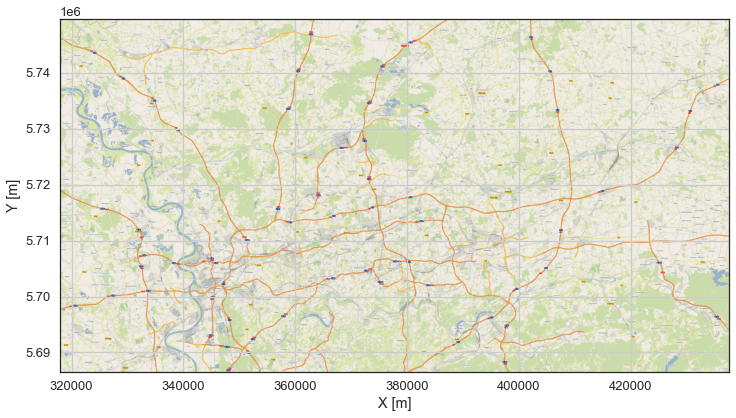

In [101]:
plt.figure(figsize = (12,12))
plt.imshow(geo_data.wms, extent= geo_data.extent[:4])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')

# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

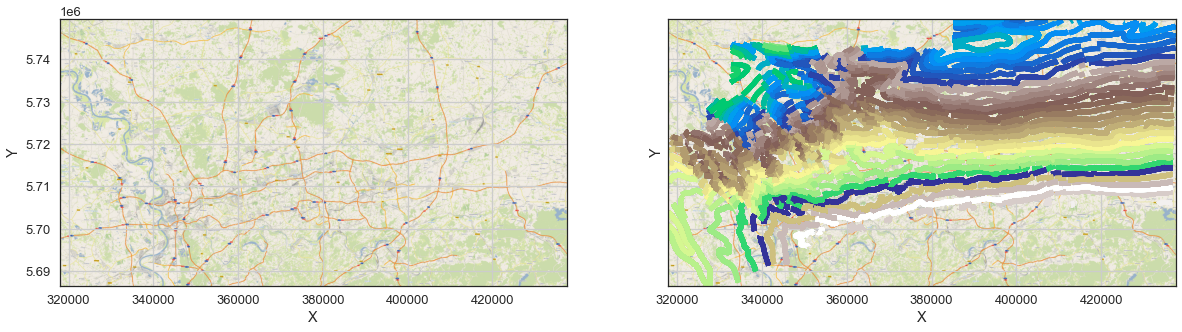

In [102]:
gg.visualization.plot_data(geo_data,
                           show_wms=True, 
                           show_interfaces=True, 
                           show_legend=False,
                           cmap_interfaces='terrain')

# Interpolation Test

In [106]:
isolines.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.00
1,2,-1250.00,Höhenlinie Karbon Top in m NHN,Entwurf Nord,2017-12-22,974.74,"LINESTRING (342364.799 5726257.363, 342746.258...",-1250.00
2,3,100.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,17212.46,"LINESTRING (419662.209 5708772.190, 421238.084...",100.00
3,4,-1000.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,8620.79,"LINESTRING (391524.138 5734377.575, 391269.923...",-1000.00
4,5,-800.00,Höhenlinie Karbon Top in m NHN,Geologische Landesaufnahme,2017-12-22,1740.63,"LINESTRING (341788.130 5717309.400, 341783.754...",-800.00


In [117]:
isos = gg.vector.extract_xy(isolines)
isos.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,geometry,formation,points,X,Y
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384953.98479999974, 5737197.433)",384953.98,5737197.43
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,"LINESTRING (384953.985 5737197.433, 384762.230...",-1100.0,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14


In [145]:
gdf = gg.vector.clip_by_extent(isos, bbox = [390000,400000,5720000,5730000])
gdf.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
46,49,-750.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,5843.36,-750.0,"(390171.4408, 5727567.434900001)",390171.44,5727567.43,POINT (390171.441 5727567.435)
46,49,-750.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,5843.36,-750.0,"(390551.30229999963, 5727484.713400001)",390551.30,5727484.71,POINT (390551.302 5727484.713)
122,126,-650.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,3980.54,-650.0,"(392460.66920000035, 5725198.6811999995)",392460.67,5725198.68,POINT (392460.669 5725198.681)
122,126,-650.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,3980.54,-650.0,"(392909.27109999955, 5725122.776000001)",392909.27,5725122.78,POINT (392909.271 5725122.776)
122,126,-650.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,3980.54,-650.0,"(393529.5569000002, 5724918.5995000005)",393529.56,5724918.60,POINT (393529.557 5724918.600)


201


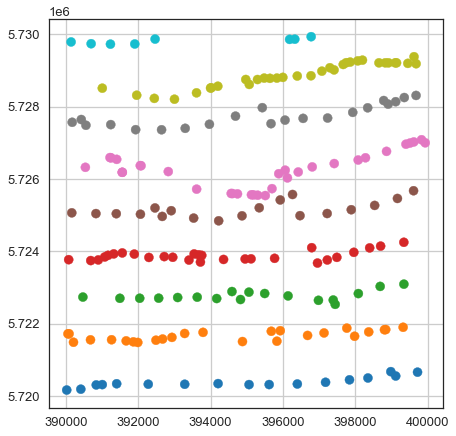

In [146]:
gdf.plot(column = 'formation')
print(len(gdf))
plt.grid()

In [151]:
raster = gg.vector.interpolate_raster(gdf, method='rbf', res=50)

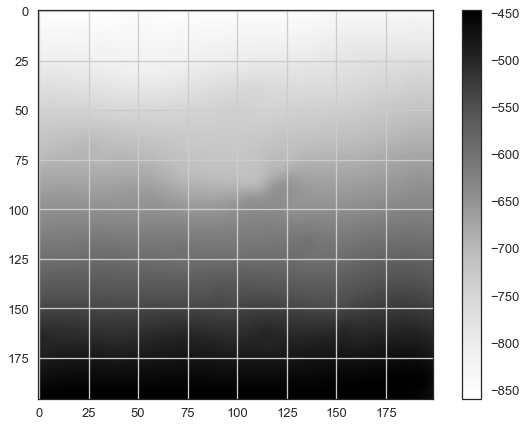

In [152]:
im = plt.imshow(raster)
plt.grid()
plt.colorbar(im)

# Clip to Extent of Münsterland Basin

In [59]:
geo_data.raw_i = gg.vector.clip_by_extent(geo_data.raw_i, bbox = [360000,500000,5700000,5800000])
geo_data.raw_i.head()

,OBJECTID,Z,LEGENDE,QUELLE,BEARBEITUN,Shape_Leng,formation,points,X,Y,geometry
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384953.98479999974, 5737197.433)",384953.98,5737197.43,POINT (384953.985 5737197.433)
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384762.2301000003, 5737179.6019)",384762.23,5737179.60,POINT (384762.230 5737179.602)
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384456.48340000026, 5737160.422700001)",384456.48,5737160.42,POINT (384456.483 5737160.423)
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(384100.25710000005, 5737149.674799999)",384100.26,5737149.67,POINT (384100.257 5737149.675)
0,1,-1100.00,Höhenlinie Karbon Top in m NHN,ergänzt,2017-12-22,10914.18,-1100.0,"(383700.32540000044, 5737117.1439)",383700.33,5737117.14,POINT (383700.325 5737117.144)


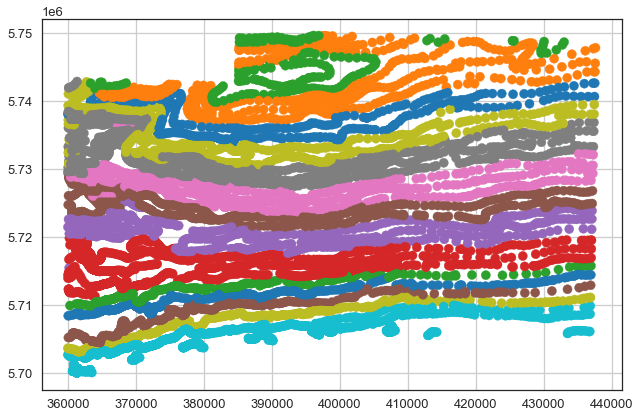

In [45]:
geo_data.raw_i.plot(column = 'formation')
plt.grid()

# Change Extent

In [35]:
geo_data.set_extent(360000,500000,5700000,5800000)
geo_data.extent

[360000, 500000, 5700000, 5800000]

# Reload WMS

In [41]:
wms_map = gg.wms.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:25832', [300000, 550000,5650000,5850000], [3000, 2000], 'image/png')

In [42]:
geo_data.wms = wms_map
geo_data.wms

array([[[0.9843137 , 0.9843137 , 0.9764706 , 1.        ],
        [0.9098039 , 0.8980392 , 0.8509804 , 1.        ],
        [0.27058825, 0.27450982, 0.41568628, 1.        ],
        ...,
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.84313726, 0.8901961 , 0.7137255 , 1.        ]],

       [[0.92156863, 0.9137255 , 0.8901961 , 1.        ],
        [0.34117648, 0.34117648, 0.47058824, 1.        ],
        [0.60784316, 0.6431373 , 0.7176471 , 1.        ],
        ...,
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.84313726, 0.8901961 , 0.7137255 , 1.        ]],

       [[0.8509804 , 0.85882354, 0.8901961 , 1.        ],
        [0.45490196, 0.45490196, 0.54509807, 1.        ],
        [0.29803923, 0.3019608 , 0.44313726, 1.        ],
        ...,
        [0.7921569 , 0.8627451 , 0.67058825, 1.        ],
        [0.7921569 , 0.862745

# Plot Data

Text(405000, 5758000, 'Münster')

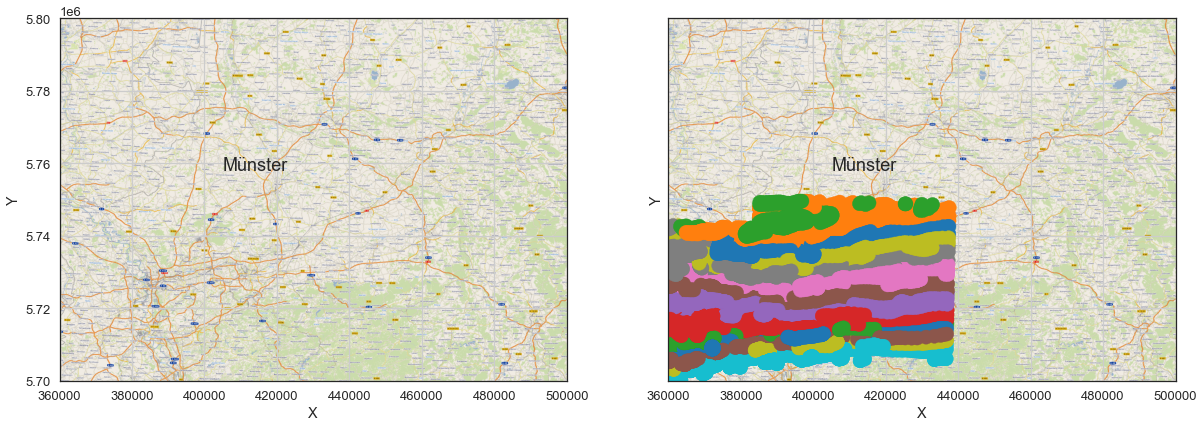

In [44]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data,
                           show_wms=True, 
                           show_interfaces=True, 
                           show_legend=False,
                           cmap_interfaces='terrain')

ax1.text(405000,5758000, 'Münster', size = 18)
ax2.text(405000,5758000, 'Münster', size = 18)

# Interpolate Isolines

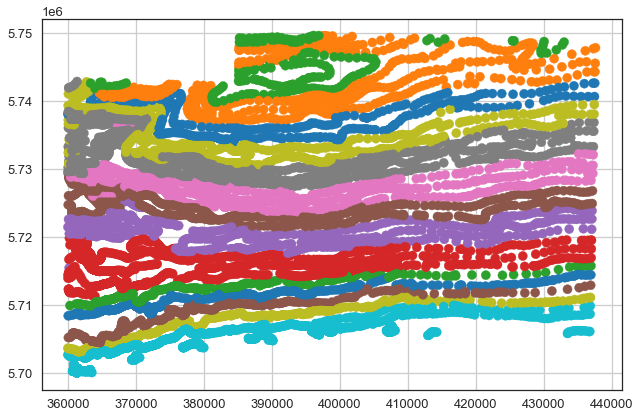

In [46]:
geo_data.raw_i.plot(column = 'formation')
plt.grid()

In [159]:
raster = gg.vector.interpolate_raster(geo_data.raw_i, method='rbf', res=500, n=1000)

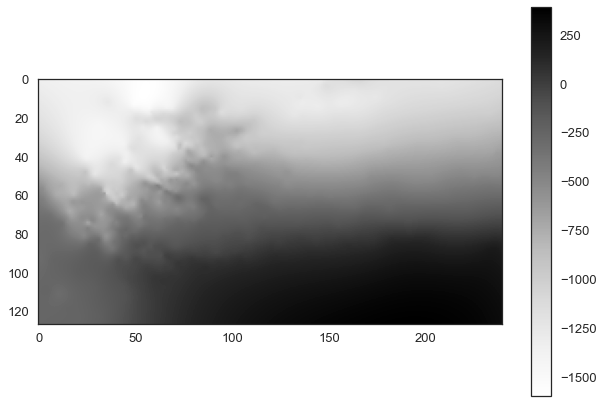

In [161]:
im = plt.imshow(raster)
plt.colorbar(im)